

Final

TF-IDF

Chloe Miao

# Classify spam and non-spam text messages using TF-IDF

## Data

The Spam Collection dataset comprises a series of text messages amassed for studying text Spam. It encompasses a total of 5,574 English messages, each labeled as 'ham' for genuine messages, or 'spam' for unsolicited content. With 747 messages identified as spam and 4,827 as non-spam, the dataset presents an imbalance that necessitates careful consideration during the data preparation phase to ensure the efficacy of subsequent analyses. The structure of the dataset ensures that each message is presented on an individual line. Moreover, every line is split into two distinct columns: 'v1', which denotes the category ('ham' or 'spam'), and 'v2', which presents the unprocessed content of the SMS.

This collection has been assembled from a variety of scholarly sources. It features an assortment of 425 spam text messages that were manually curated from Grumbletext, a public forum in the UK where individuals report unsolicited text messages. The corpus also includes a randomly selected sample of 3,375 non-spam texts from the NUS SMS Corpus (NSC), a repository of around 10,000 genuine messages assembled for academic purposes at the National University of Singapore's Department of Computer Science. Additionally, the dataset integrates 450 non-spam messages derived from the doctoral dissertation of Caroline Tagg. The collection is further enriched by the inclusion of the text Spam Corpus v.0.1 Big, which comprises 1,002 messages categorized as non-spam and 322 classified as spam.

## Data Preparation

The preparation of the dataset is a multi-step process aimed at optimizing the data for analysis. The initial phase involves discarding three superfluous columns to streamline the dataset. The remaining columns are then renamed for greater clarity and ease of understanding. The categorization of spam messages is simplified through binary encoding, assigning '0' to non-spam and '1' to spam messages. This is followed by the removal of duplicates and any entries with missing values, ensuring the dataset's integrity. The cleaned dataset thus consists of 4,516 non-spam and 653 spam messages, highlighting the predominance of legitimate texts. To address the imbalance and enhance the dataset's utility for training equitable machine learning models, a downsampling of non-spam messages is performed, equalizing the representation of both message types. This step ensures an even representation of spam and non-spam messages, resulting in a balanced dataset comprising 653 messages from each category.








In [ ]:
# import packages needed
import os
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
# Load the Drive helper and make my google drive available to get data from my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# change directory
os.chdir("/content/drive/MyDrive/DS-5780-NLP")
os.listdir()

['spam.csv', 'reading_600_texts.csv', 'nrc.csv']

In [ ]:
# read in the data
reading_data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

# display the data
print(reading_data.head())

# see dimensions of the data
reading_data.shape

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


(5572, 5)

In [ ]:
# Select only the first two columns and rename them
cleaned_data = reading_data[['v1', 'v2']].rename(columns={'v1': 'spam', 'v2': 'message'})

# Change 'ham' to 0 and 'spam' to 1 in the 'spam' column
cleaned_data['spam'] = cleaned_data['spam'].map({'ham': 0, 'spam': 1})
print(cleaned_data.head())

   spam                                            message
0     0  Go until jurong point, crazy.. Available only ...
1     0                      Ok lar... Joking wif u oni...
2     1  Free entry in 2 a wkly comp to win FA Cup fina...
3     0  U dun say so early hor... U c already then say...
4     0  Nah I don't think he goes to usf, he lives aro...


In [ ]:
# check if there are any missing values
missing_values = cleaned_data.isnull().sum()
missing_values

spam       0
message    0
dtype: int64

In [ ]:
# Check if there's any duplicates
duplicated_values = cleaned_data[cleaned_data['message'].duplicated()]
print(duplicated_values)

      spam                                            message
102      0  As per your request 'Melle Melle (Oru Minnamin...
153      0  As per your request 'Melle Melle (Oru Minnamin...
206      0  As I entered my cabin my PA said, '' Happy B'd...
222      0                             Sorry, I'll call later
325      0                   No calls..messages..missed calls
...    ...                                                ...
5524     1  You are awarded a SiPix Digital Camera! call 0...
5535     0  I know you are thinkin malaria. But relax, chi...
5539     0                         Just sleeping..and surfing
5553     0                        Hahaha..use your brain dear
5558     0                             Sorry, I'll call later

[403 rows x 2 columns]


In [ ]:
# Remove all the dulicates
cleaned_data = cleaned_data.drop_duplicates(subset=['message'], keep='first')
print(cleaned_data.shape)

(5169, 2)


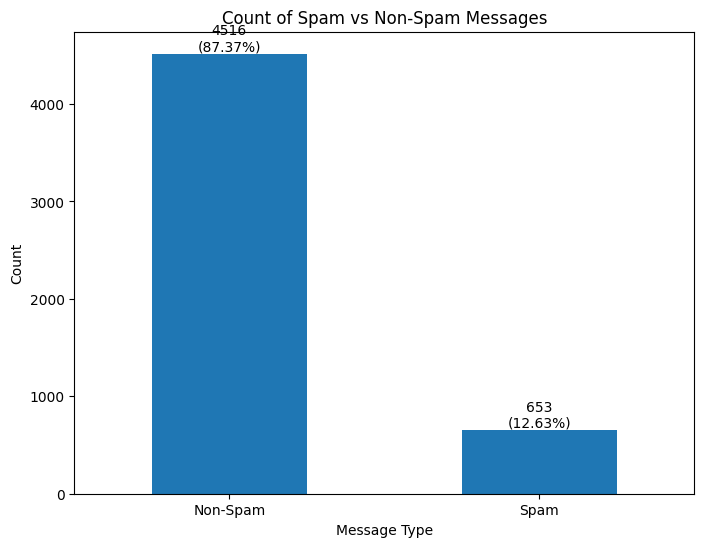

In [ ]:
# visualize the dataset
# Calculate the raw counts and percentages
spam_counts = cleaned_data['spam'].value_counts()
total_messages = cleaned_data['spam'].count()
percentages = (spam_counts / total_messages) * 100

# Plotting with counts and annotate with counts and percentages
plt.figure(figsize=(8, 6))
spam_counts.plot(kind='bar')
plt.title('Count of Spam vs Non-Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Spam', 'Spam'], rotation=0)

# Annotate with both counts and percentages
for index, value in enumerate(spam_counts):
    plt.text(index, value, f'{value}\n({percentages[index]:.2f}%)', ha='center', va='bottom')

plt.show()

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = cleaned_data[cleaned_data.spam==0]
df_minority = cleaned_data[cleaned_data.spam==1]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),     # to match minority class
                                   random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Displaying the new balance of the dataset
balanced_counts = df_balanced['spam'].value_counts()
balanced_shape = df_balanced.shape

print(balanced_counts, balanced_shape)

spam
0    653
1    653
Name: count, dtype: int64 (1306, 2)


## Analysis



In [ ]:
# Load English tokenizer, tagger, parser, and NER
nlp = spacy.load("en_core_web_sm")

# Function to remove stop words
def remove_stop_words(text):
    doc = nlp(text)
    filtered_sentence = [token.text for token in doc if not token.is_stop]
    return " ".join(filtered_sentence)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply the function to remove stop words from each message
df_balanced['message_no_stopwords'] = df_balanced['message'].apply(remove_stop_words)

# remove the words with the lowest document occurance by setting min_df=3
tfidf_vectorizer = TfidfVectorizer(min_df=3)

# Fit and transform the messages to a TF-IDF representation
tfidf_matrix = tfidf_vectorizer.fit_transform(df_balanced['message_no_stopwords'])

# Now, we'll convert the TF-IDF matrix to a DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Add the spam label back to the DataFrame
tfidf_df['spam'] = df_balanced['spam'].values
print(tfidf_df)

       00  000   02  0207   03   04   05   06  07xxxxxxxxx  0800  ...  \
0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0          0.0   0.0  ...   
1     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0          0.0   0.0  ...   
2     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0          0.0   0.0  ...   
3     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0          0.0   0.0  ...   
4     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0          0.0   0.0  ...   
...   ...  ...  ...   ...  ...  ...  ...  ...          ...   ...  ...   
1301  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0          0.0   0.0  ...   
1302  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0          0.0   0.0  ...   
1303  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0          0.0   0.0  ...   
1304  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0          0.0   0.0  ...   
1305  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0          0.0   0.0  ...   

           yes  yesterday   yo  you   yr  yrs  yup  zed   ìï  spam  
0     0.000000        0.0  0.0  0.0  0.0  0.0  0.0  0.

In [ ]:
# Fit and transform the messages (without stop words) to a TF-IDF representation
tfidf_scores_no_stopwords = tfidf_vectorizer.fit_transform(df_balanced['message_no_stopwords'])

# Convert the TF-IDF scores to a DataFrame for easier analysis
tfidf_df_no_stopwords = pd.DataFrame(tfidf_scores_no_stopwords.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Add the spam column back to the DataFrame to differentiate between spam and non-spam messages
tfidf_df_no_stopwords['spam'] = df_balanced['spam'].values

# Calculate the average TF-IDF score for each term, separated by spam and non-spam messages.
average_tfidf_scores_no_stopwords = tfidf_df_no_stopwords.groupby('spam').mean().T
average_tfidf_scores_no_stopwords.columns = ['Non-Spam Avg TF-IDF', 'Spam Avg TF-IDF']

# Display the terms with the highest average TF-IDF scores for spam and non-spam messages.
highest_non_spam_tfidf_no_stopwords = average_tfidf_scores_no_stopwords.sort_values(by='Non-Spam Avg TF-IDF', ascending=False).head(10)
highest_spam_tfidf_no_stopwords = average_tfidf_scores_no_stopwords.sort_values(by='Spam Avg TF-IDF', ascending=False).head(10)

highest_non_spam_tfidf_no_stopwords, highest_spam_tfidf_no_stopwords

(       Non-Spam Avg TF-IDF  Spam Avg TF-IDF
 come              0.017810         0.000559
 time              0.014335         0.005324
 gt                0.013527         0.000000
 lt                0.013286         0.000000
 going             0.012964         0.000851
 know              0.012617         0.005792
 want              0.012297         0.007581
 ok                0.012222         0.001880
 nt                0.012028         0.003423
 got               0.011938         0.001410,
         Non-Spam Avg TF-IDF  Spam Avg TF-IDF
 free               0.001358         0.039846
 txt                0.000620         0.026599
 mobile             0.000000         0.026555
 text               0.003069         0.025189
 stop               0.000599         0.024294
 claim              0.000000         0.024173
 ur                 0.008567         0.023968
 reply              0.000000         0.023917
 prize              0.000000         0.023187
 www                0.000000         0.01923

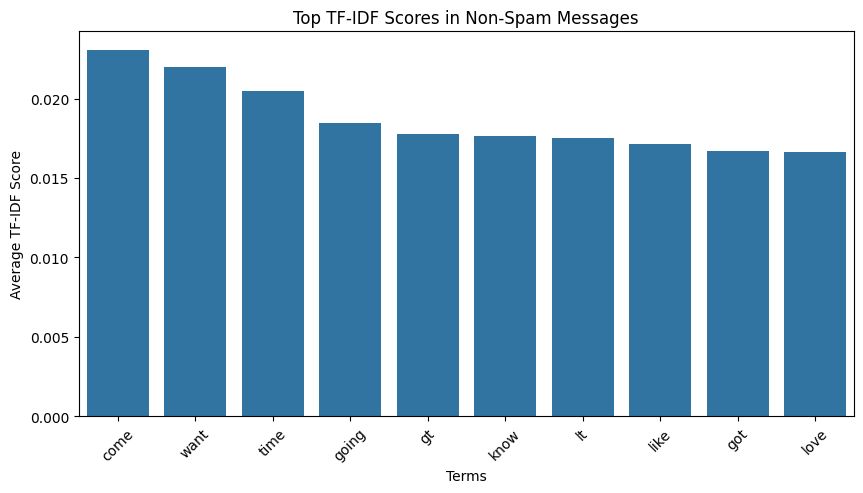

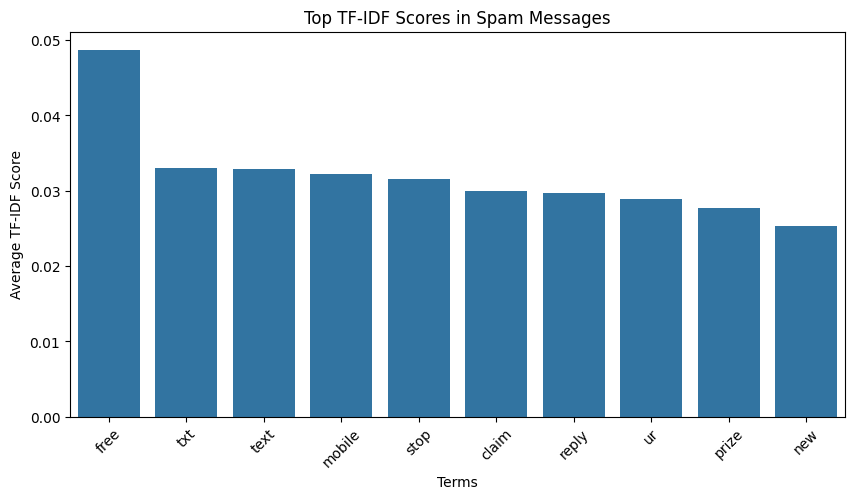

In [ ]:
# Create a bar chart for the highest TF-IDF scores in non-spam messages
plt.figure(figsize=(10, 5))
sns.barplot(x=highest_non_spam_tfidf_no_stopwords.index, y='Non-Spam Avg TF-IDF', data=highest_non_spam_tfidf_no_stopwords)
plt.xticks(rotation=45)
plt.title('Top TF-IDF Scores in Non-Spam Messages')
plt.ylabel('Average TF-IDF Score')
plt.xlabel('Terms')
plt.show()

# Create a bar chart for the highest TF-IDF scores in spam messages
plt.figure(figsize=(10, 5))
sns.barplot(x=highest_spam_tfidf_no_stopwords.index, y='Spam Avg TF-IDF', data=highest_spam_tfidf_no_stopwords)
plt.xticks(rotation=45)
plt.title('Top TF-IDF Scores in Spam Messages')
plt.ylabel('Average TF-IDF Score')
plt.xlabel('Terms')
plt.show()


Logistic Regression - Accuracy: 0.9312977099236641
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       133
           1       0.97      0.88      0.93       129

    accuracy                           0.93       262
   macro avg       0.94      0.93      0.93       262
weighted avg       0.93      0.93      0.93       262



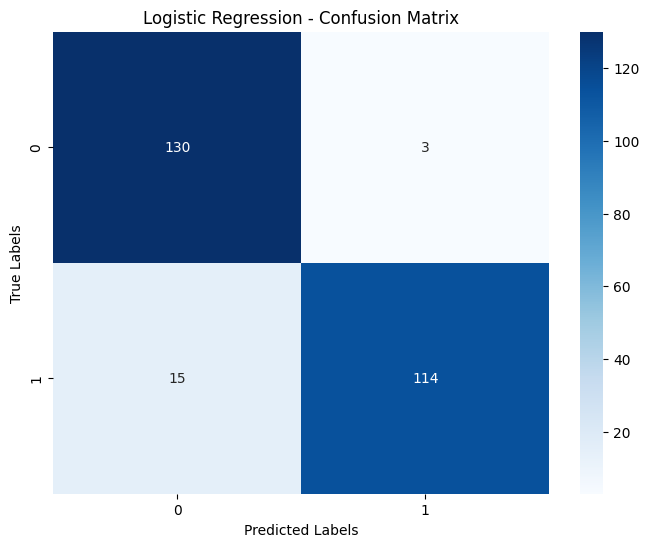

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split the data into features and labels
X = tfidf_df.drop('spam', axis=1)  # Features
y = tfidf_df['spam']  # Labels

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
lr_classifier = LogisticRegression(random_state=42)

# Create a dictionary to store classifier
classifiers = {
    "Logistic Regression": lr_classifier
}

# Train, predict and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Print the evaluation results
    print(f"\n{name} - Accuracy: {accuracy}")
    print(f"{name} - Classification Report:\n{class_report}")

    # Plot confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [ ]:
# Fit the Logistic Regression classifier
lr_classifier.fit(X_train, y_train)

# Retrieve the coefficients from the classifier
coefficients = lr_classifier.coef_[0]  # Get the coefficients for the features
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the Logistic Regression coefficients to a DataFrame
coef_df = pd.DataFrame({'coefficients': coefficients,
                        'vocabulary': feature_names})

# Sort by the absolute values of coefficients to get the most negative and most positive coefficients
most_negative = coef_df.sort_values(by='coefficients').head(20).reset_index(drop=True)
most_positive = coef_df.sort_values(by='coefficients', ascending=False).head(20).reset_index(drop=True)

# Concatenate the most negative and most positive coefficients for comparison
comparison_df = pd.concat([most_negative, most_positive], axis=1)

# Rename columns for clarity
comparison_df.columns = ['Coefficients_Negative', 'Feature_non_spam', 'Coefficients_Positive', 'Feature_spam']

# Display the DataFrame
comparison_df

,Coefficients_Negative,Feature_non_spam,Coefficients_Positive,Feature_spam
0,-1.356113,come,2.770275,txt
1,-1.163827,gt,2.580633,mobile
2,-1.123160,lt,2.294480,reply
3,-1.117640,ok,2.259505,free
4,-1.075308,lor,2.129217,stop
5,-1.029592,wat,2.126483,claim
6,-1.018382,home,1.951656,new
7,-0.979050,way,1.948135,text
8,-0.975741,going,1.942266,www
9,-0.957397,na,1.927420,150p
